In [1]:
 import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data = "../data/CPW_V_LE.csv"
model = pd.read_csv(data)
model.head()

,country,Year,Children Per Woman,Life Expectancy (Years)
0,Bangladesh,1799,6.7,25.5
1,Bangladesh,1800,6.7,25.5
2,Bangladesh,1801,6.7,25.5
3,Bangladesh,1802,6.7,25.5
4,Bangladesh,1803,6.7,25.5


In [19]:
data = model.values
x=data[:, 1:4]
y=data[:, 0]


In [20]:
 from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [21]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Encoded Label: 0
------------
Original Class: Bangladesh
Enco

Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded Label: 5
------------
Original Class: Ethiopia
Encoded La

Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
------------
Original Class: Russia
Encoded Label: 11
----------

In [22]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [23]:
pd.get_dummies(y)

,Bangladesh,Brazil,China,"Congo, Dem. Rep.",Egypt,Ethiopia,India,Indonesia,Japan,Nigeria,Pakistan,Russia,Tanzania,United States
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3118,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3119,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3120,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
X = model[["country","Life Expectancy (Years)"]]
y = model["Children Per Woman"].values.reshape(-1, 1)

print(model["Life Expectancy (Years)"].shape)
print("Shape: ", X.shape, y.shape)

(3122,)
Shape:  (3122, 2) (3122, 1)


In [25]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Life Expectancy (Years),country_Bangladesh,country_Brazil,country_China,"country_Congo, Dem. Rep.",country_Egypt,country_Ethiopia,country_India,country_Indonesia,country_Japan,country_Nigeria,country_Pakistan,country_Russia,country_Tanzania,country_United States
1208,29.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2086,31.4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1929,30.7,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2530,31.3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1558,72.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [26]:
 from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [27]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

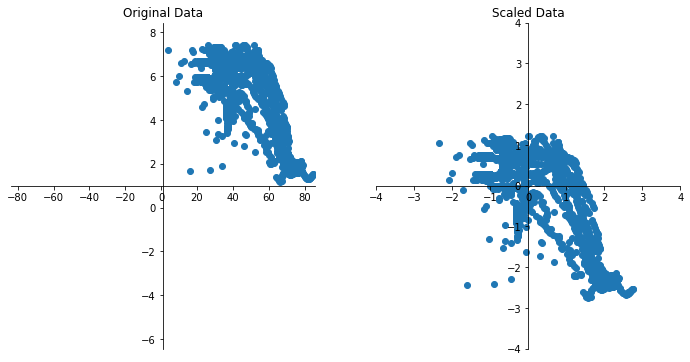

In [28]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Life Expectancy (Years)"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-4, 4)
axes2.set_ylim(-4, 4)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Life Expectancy (Years)"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

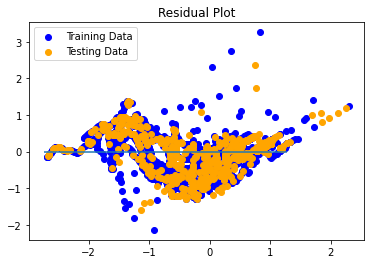

In [31]:
 # Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2519792476123176, R2: 0.7507402777569412


In [ ]:
#take x-test, y-test & predictions
#y_scaler.inverse_transform(predictions)

AttributeError: 'numpy.ndarray' object has no attribute 'from_records'